# Gender Recognition by Voice | 03 | K Nearest Neighbors

In [1]:
import obj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [6]:
data_scale = obj.load('var/data_scale')

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_scale.drop('label',axis=1), data_scale['label'],
                                                    test_size=0.30)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
error_rate = []
kvals = range(1,20)

for i in kvals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

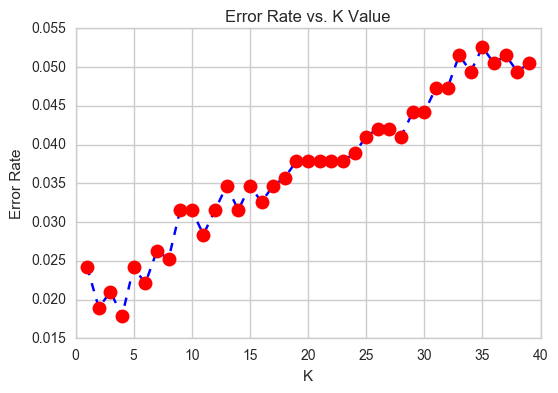

In [13]:
plt.plot(kvals, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
kloc = error_rate.index(min(error_rate))
print('Lowest error of %s occurs at k=%s.' % (error_rate[kloc], kvals[kloc]))

Lowest error of 0.0178759200841 occurs at k=4.


In [27]:
knn = KNeighborsClassifier(n_neighbors=kvals[kloc])
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[456  11]
 [  6 478]]


             precision    recall  f1-score   support

     female       0.99      0.98      0.98       467
       male       0.98      0.99      0.98       484

avg / total       0.98      0.98      0.98       951



*NEXT: Eliminate correlated data and see what happens. Maybe create a new variable in sheet 02 that drops corellated data.*